In [ ]:
#Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LTSM)
#            To predict the closing price of BITCOIN Using the past 60 day price.


In [11]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
import pandas_datareader as web

In [13]:
df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-11-25')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.696352
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.000614
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.002876
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.339447
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.274624
...,...,...,...,...,...,...
2020-11-19,119.059998,116.809998,117.589996,118.639999,74113000.0,118.639999
2020-11-20,118.769997,117.290001,118.639999,117.339996,73391400.0,117.339996
2020-11-23,117.620003,113.750000,117.180000,113.849998,127959300.0,113.849998


In [14]:
dff = web.DataReader('NFLX', data_source='yahoo', start='2015-01-01', end='2020-11-25')
dff


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,50.331429,48.731430,49.151428,49.848572,13475000.0,49.848572
2015-01-05,49.258572,47.147144,49.258572,47.311428,18165000.0,47.311428
2015-01-06,47.639999,45.661430,47.347141,46.501427,16037700.0,46.501427
2015-01-07,47.421429,46.271427,47.347141,46.742859,9849700.0,46.742859
2015-01-08,47.835712,46.478573,47.119999,47.779999,9601900.0,47.779999
...,...,...,...,...,...,...
2020-11-19,487.799988,480.470001,482.000000,484.670013,2254700.0,484.670013
2020-11-20,494.760010,481.570007,485.220001,488.239990,4253400.0,488.239990
2020-11-23,491.149994,475.839996,490.459991,476.619995,5416600.0,476.619995


In [15]:
dfff = web.DataReader('BTC-USD', data_source='yahoo', start='2015-01-01', end='2020-11-25')
dfff


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999
...,...,...,...,...,...,...
2020-11-22,18688.968750,17671.384766,18642.232422,18370.001953,41280434225,18370.001953
2020-11-23,18711.425781,18000.796875,18370.017578,18364.121094,42741112307,18364.121094
2020-11-24,19348.271484,18128.656250,18365.015625,19107.464844,51469565008,19107.464844


In [16]:
#Get the number of rows and columns in the data set 
dfff.shape

(2157, 6)

In [17]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
import pandas_datareader as web

In [20]:
dfff = web.DataReader('BTC-USD', data_source='yahoo', start='2015-01-01', end='2020-11-25')
dfff

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999
...,...,...,...,...,...,...
2020-11-22,18688.968750,17671.384766,18642.232422,18370.001953,41280434225,18370.001953
2020-11-23,18711.425781,18000.796875,18370.017578,18364.121094,42741112307,18364.121094
2020-11-24,19348.271484,18128.656250,18365.015625,19107.464844,51469565008,19107.464844


In [5]:
dfff.shape

(2157, 6)

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

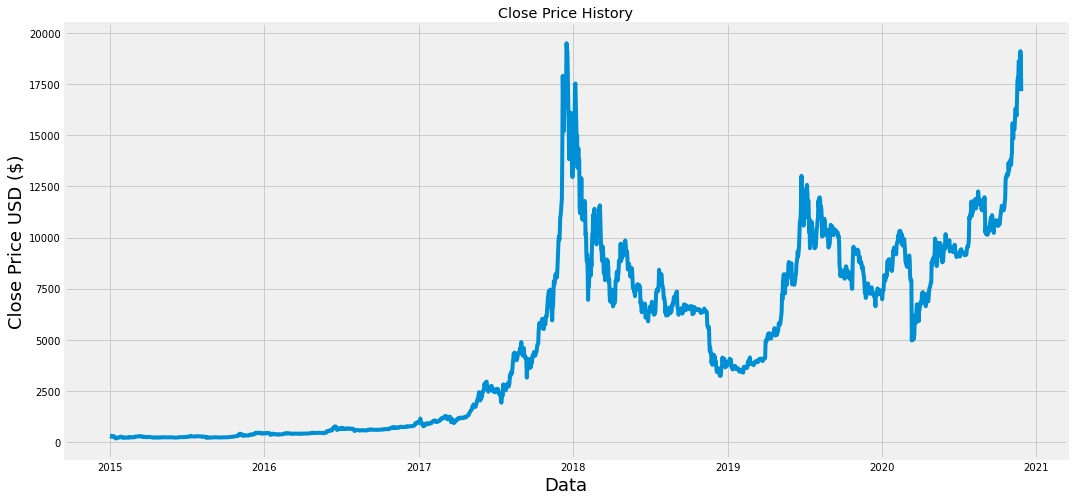

In [22]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dfff['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [23]:
import math

In [24]:
#Create a new dataframe with only the 'Close column'
data = dfff.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1726

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00704715],
       [0.00708768],
       [0.00533037],
       ...,
       [0.97981627],
       [0.96038783],
       [0.87852678]])

In [27]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print

[array([0.00704715, 0.00708768, 0.00533037, 0.00445627, 0.00498833,
       0.00559472, 0.00601647, 0.00544771, 0.0058131 , 0.005005  ,
       0.0045321 , 0.00464266, 0.00247204, 0.        , 0.00164297,
       0.00155254, 0.00109512, 0.00166859, 0.00190266, 0.00171911,
       0.00252566, 0.00286258, 0.0028353 , 0.00361007, 0.00391396,
       0.00493651, 0.004419  , 0.00288892, 0.00286812, 0.00250123,
       0.00203739, 0.00252954, 0.00311223, 0.00254487, 0.00252338,
       0.00201912, 0.00228595, 0.00257002, 0.00234527, 0.00217435,
       0.00216033, 0.00212647, 0.00225997, 0.00296719, 0.00410046,
       0.00293603, 0.0028852 , 0.00339075, 0.00301372, 0.00321854,
       0.0033995 , 0.00343858, 0.00299566, 0.00314654, 0.00313842,
       0.00307294, 0.0030189 , 0.00391966, 0.00394217, 0.00424959])]
[0.0050502362799632605]
[array([0.00704715, 0.00708768, 0.00533037, 0.00445627, 0.00498833,
       0.00559472, 0.00601647, 0.00544771, 0.0058131 , 0.005005  ,
       0.0045321 , 0.00464266, 0.0

In [28]:
import numpy as np

In [29]:
#Convert the x_train & y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
#Reshape the Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1666, 60, 1)

In [31]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [32]:
from tensorflow.keras import Sequential


In [33]:
from tensorflow.keras.layers import Dense

In [34]:
from tensorflow.keras.layers import LSTM

In [36]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [38]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1666/1666 [==============================] - 82s 49ms/step - loss: 0.0022


In [42]:
#Create the testing data set
#Create new array containing scaled values from index 1666 to 2166
test_data = scaled_data[training_data_len - 60:,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [44]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [45]:
#Reshape data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [46]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [48]:
#Get the route mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

153.5851965813515

<ipython-input-50-4a4f2b1094c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


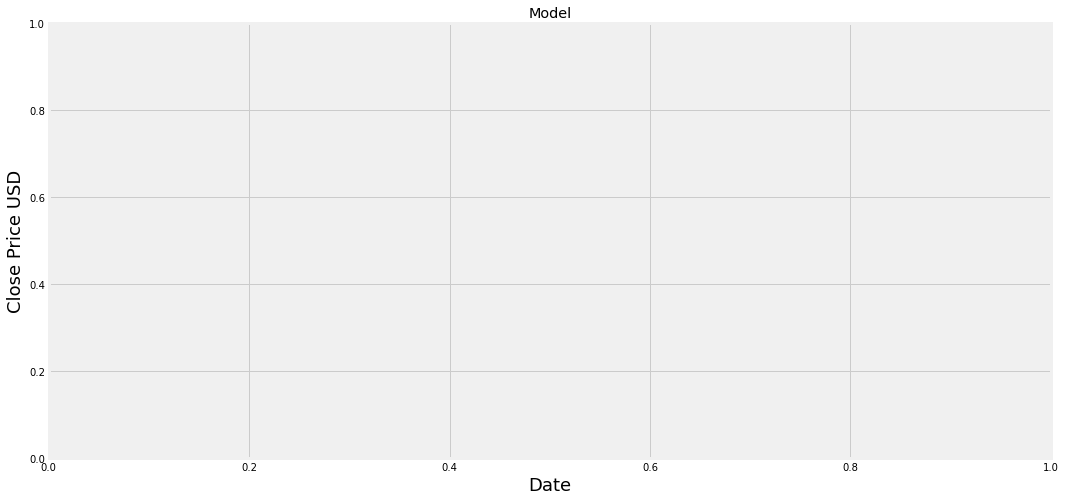

In [50]:
#plot data 
train = data[:training_data_len:]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()
